In [66]:
import os
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

from bs4 import BeautifulSoup

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize

from collections import Counter

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [55]:
# 다시 읽어보기

f = open("/content/sample_data/Omniscient Reader (Official Trailer)_8OHzcTtoLo4.txt", 'r')
review = f.read()
f.close()
print(review[:1000])

Read Omniscient Reader now:

https://bit.ly/3j3IWGm "who are you?"
"I'm just a reader"
Me : then who am I? :")))))) Han sooyong is the writer I dont really read novel, specially Korean ones. But I Must say, ORV is an Amazing, well-Created Story. From all the Mangas or Novel I have read, never I feel so confused with the plot and stuff, Yet feeling hungry to know what happens next and keep reading as if its something that must be read. The ending was unexpected for me, even tho a friend of mine who introduce me to it has giving a few big spoilers(whcih I asked them to, since I need spoiler to keep reading), I never seen a Novel/Manga with an ending like that, an Ending that makes you feel as if you are the "???" Of the story.. I just finished reading chapter 43, to me, it felt like the theatre owner is the author of the novel because he blushed when dokja pierced through his forehead after entering dokja's mind/ memories ,where he saw the texts of the novel... This is probably the best 

In [56]:
#구두점등 특수문자 [!”#$%&’()*+,-./:;<=>?@[]^_`{|}~]  제거

import string
translator = str.maketrans('','',string.punctuation)
result = str(review).translate(translator)
result = result.lower()
print(result)

read omniscient reader now

httpsbitly3j3iwgm who are you
im just a reader
me  then who am i  han sooyong is the writer i dont really read novel specially korean ones but i must say orv is an amazing wellcreated story from all the mangas or novel i have read never i feel so confused with the plot and stuff yet feeling hungry to know what happens next and keep reading as if its something that must be read the ending was unexpected for me even tho a friend of mine who introduce me to it has giving a few big spoilerswhcih i asked them to since i need spoiler to keep reading i never seen a novelmanga with an ending like that an ending that makes you feel as if you are the  of the story i just finished reading chapter 43 to me it felt like the theatre owner is the author of the novel because he blushed when dokja pierced through his forehead after entering dokjas mind memories where he saw the texts of the novel this is probably the best official webtoon trailer i see props its intriguing s

In [58]:
# 이모티콘 제거
result = result.encode('utf-8').decode('ascii', 'ignore') 
result

'read omniscient reader now\n\nhttpsbitly3j3iwgm who are you\nim just a reader\nme  then who am i  han sooyong is the writer i dont really read novel specially korean ones but i must say orv is an amazing wellcreated story from all the mangas or novel i have read never i feel so confused with the plot and stuff yet feeling hungry to know what happens next and keep reading as if its something that must be read the ending was unexpected for me even tho a friend of mine who introduce me to it has giving a few big spoilerswhcih i asked them to since i need spoiler to keep reading i never seen a novelmanga with an ending like that an ending that makes you feel as if you are the  of the story i just finished reading chapter 43 to me it felt like the theatre owner is the author of the novel because he blushed when dokja pierced through his forehead after entering dokjas mind memories where he saw the texts of the novel this is probably the best official webtoon trailer i see props its intrigu

In [59]:
result = str(result)

In [63]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) 
stop_words.update(['reading','read','think','im','constellations','oh','would','like','see','one','know','read','cant','get','hes','dont','good','really','give','right','even','want','doesnt','got'])

word_tokens = word_tokenize(result)

Result = []
for w in word_tokens: 
    if w not in stop_words: 
        Result.append(w) 

print(word_tokens,'\n')
print(Result) 

['read', 'omniscient', 'reader', 'now', 'httpsbitly3j3iwgm', 'who', 'are', 'you', 'im', 'just', 'a', 'reader', 'me', 'then', 'who', 'am', 'i', 'han', 'sooyong', 'is', 'the', 'writer', 'i', 'dont', 'really', 'read', 'novel', 'specially', 'korean', 'ones', 'but', 'i', 'must', 'say', 'orv', 'is', 'an', 'amazing', 'wellcreated', 'story', 'from', 'all', 'the', 'mangas', 'or', 'novel', 'i', 'have', 'read', 'never', 'i', 'feel', 'so', 'confused', 'with', 'the', 'plot', 'and', 'stuff', 'yet', 'feeling', 'hungry', 'to', 'know', 'what', 'happens', 'next', 'and', 'keep', 'reading', 'as', 'if', 'its', 'something', 'that', 'must', 'be', 'read', 'the', 'ending', 'was', 'unexpected', 'for', 'me', 'even', 'tho', 'a', 'friend', 'of', 'mine', 'who', 'introduce', 'me', 'to', 'it', 'has', 'giving', 'a', 'few', 'big', 'spoilerswhcih', 'i', 'asked', 'them', 'to', 'since', 'i', 'need', 'spoiler', 'to', 'keep', 'reading', 'i', 'never', 'seen', 'a', 'novelmanga', 'with', 'an', 'ending', 'like', 'that', 'an', '

In [64]:
# 빈도 탐색
cnt = Counter(Result)
vocab_sorted = sorted(cnt.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted[:20])

[('webtoon', 249), ('novel', 189), ('solo', 115), ('anime', 110), ('story', 98), ('leveling', 98), ('dokja', 95), ('love', 90), ('reader', 85), ('trailer', 63), ('chapters', 62), ('ive', 60), ('best', 59), ('already', 53), ('mc', 50), ('manhwa', 49), ('kim', 47), ('na', 47), ('much', 47), ('amazing', 43)]


<Figure size 432x288 with 0 Axes>

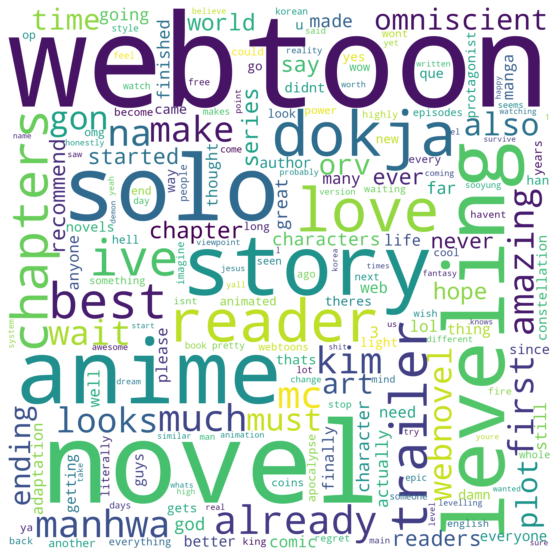

<Figure size 432x288 with 0 Axes>

In [67]:
wc = WordCloud(background_color='white',
#                colormap='Greens',
               width=1000, 
               height=1000, 
               scale=2.0, 
               max_font_size=300)
gen = wc.generate_from_frequencies(cnt)
plt.figure(figsize=(10,10))       
plt.axis('off') 
plt.imshow(wc,interpolation='bilinear')
plt.savefig('(eng)유튜브워드클라우드.png',dpi=200 ,facecolor='#eeeeee')
plt.figure()